In [1]:
import matplotlib.pyplot as plt
import uproot

from decayvertex.process_data import LorentzVectorArray, ThreeVectorArray
from decayvertex.plotting import plot_histogram, plot_multiple_histograms_with_ratio

# plot style
import mplhep
plt.style.use(mplhep.style.ATLAS)

### Read Data With `uproot`

In [3]:
data = uproot.open("data/data.root")["NOMINAL"]
data.keys()

['charged_pion_truth_p4',
 'neutral_pion_truth_p4',
 'tau_vis_truth_p4',
 'muon_truth_p4',
 'tau_lep_truth_p4',
 'tau_had_truth_p4',
 'truth_lep_decayVertex_v3',
 'est_lep_decayVertex_v3',
 'truth_primaryVertex_v3',
 'lep_impactParameter']

We can then extract the input variables we need, as well as the predicted and truth values. 

For instance, the muon 4-vector:

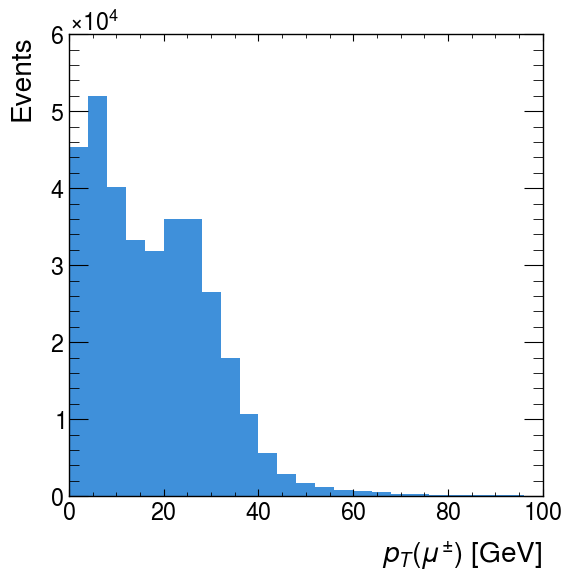

<Figure size 800x600 with 0 Axes>

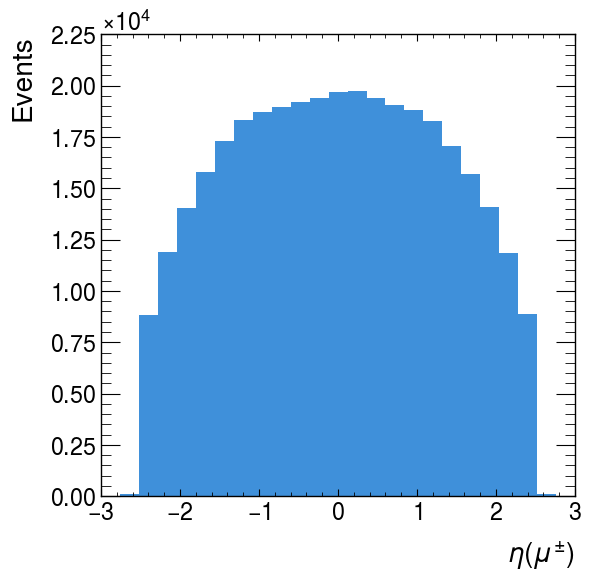

<Figure size 800x600 with 0 Axes>

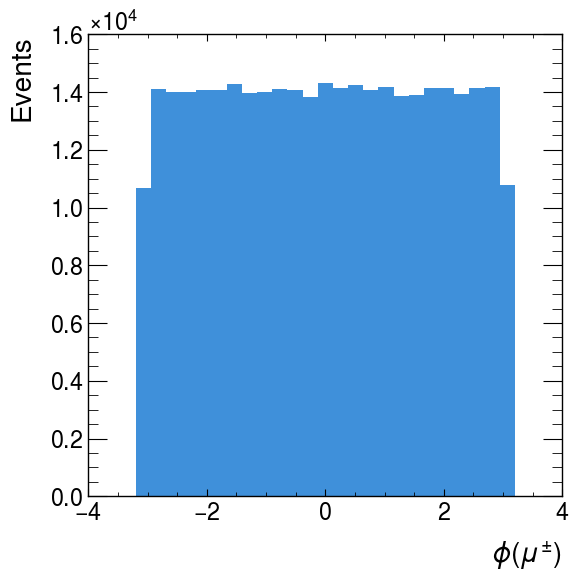

<Figure size 800x600 with 0 Axes>

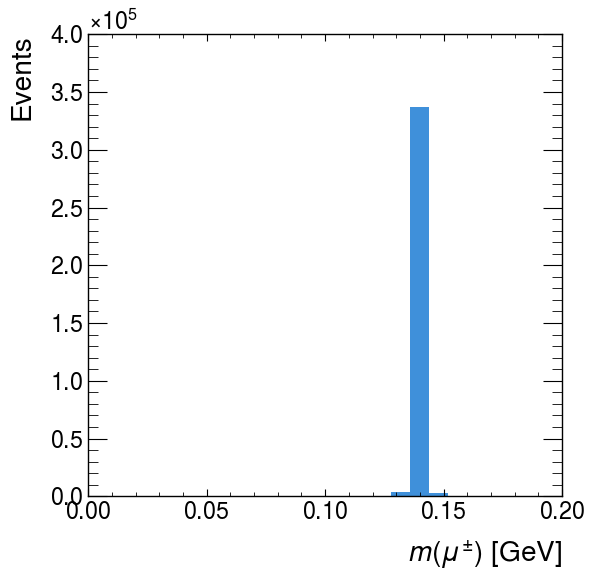

<Figure size 800x600 with 0 Axes>

In [4]:
muon_truth_p4 = data['charged_pion_truth_p4'].array()
muon_truth_p4 = LorentzVectorArray(muon_truth_p4)
plot_histogram(muon_truth_p4.pt, bins=25, range=(0, 100), 
               xlabel=r"$p_T(\mu^{\pm})$ [GeV]", ylabel="Events",
               save = 'plots/muon_pt.pdf')
plot_histogram(muon_truth_p4.eta, bins=25, range=(-3, 3), 
               xlabel=r"$\eta(\mu^{\pm})$", ylabel="Events",
               save = 'plots/muon_eta.pdf')
plot_histogram(muon_truth_p4.phi, bins=25, range=(-3.2, 3.2), 
               xlabel=r"$\phi(\mu^{\pm})$", ylabel="Events",
               save = 'plots/muon_phi.pdf')
plot_histogram(muon_truth_p4.m, bins=25, range=(0, 0.2), 
               xlabel=r"$m(\mu^{\pm})$ [GeV]", ylabel="Events",
               save = 'plots/muon_mass.pdf')

## Decay Vertex!

I plot the truth and the classical estimate of the decay vertex below. This is what we're trying to improve upon:

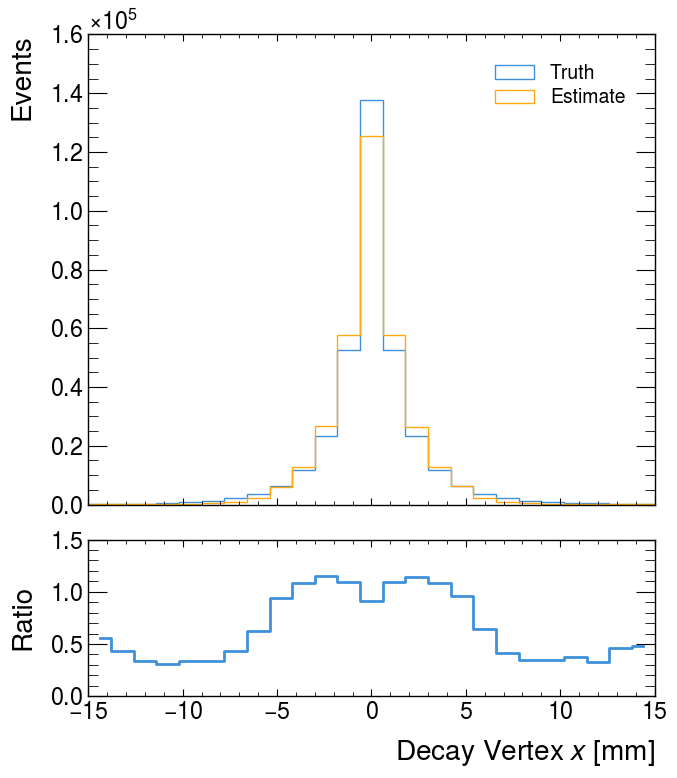

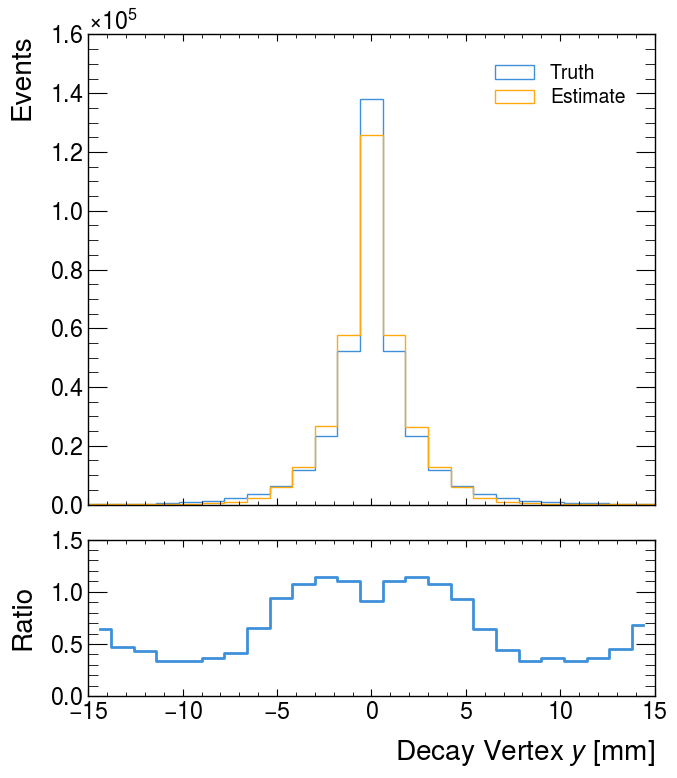

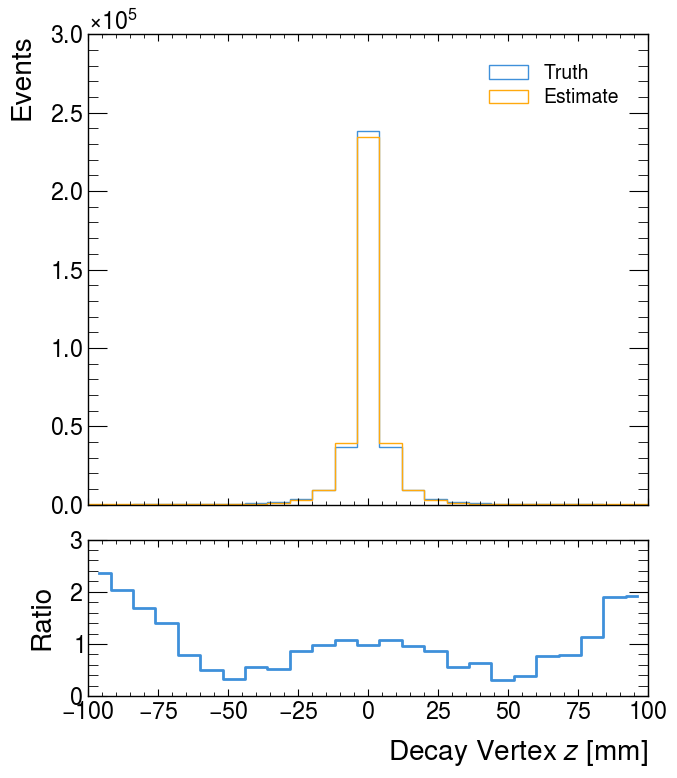

In [5]:
truth_decau_vertex = data['truth_lep_decayVertex_v3'].array()
truth_decau_vertex = ThreeVectorArray(truth_decau_vertex)
est_decau_vertex = data['est_lep_decayVertex_v3'].array()
est_decau_vertex = ThreeVectorArray(est_decau_vertex)
plot_multiple_histograms_with_ratio([truth_decau_vertex.x, est_decau_vertex.x], bins=25, range=(-15, 15),
                         xlabel=r"Decay Vertex $x$ [mm]", ylabel="Events",
                         labels=["Truth", "Estimate"],
                         save = 'plots/decay_vertex_x.pdf')
plot_multiple_histograms_with_ratio([truth_decau_vertex.y, est_decau_vertex.y], bins=25, range=(-15, 15),
                            xlabel=r"Decay Vertex $y$ [mm]", ylabel="Events",
                            labels=["Truth", "Estimate"],
                            save = 'plots/decay_vertex_y.pdf')
plot_multiple_histograms_with_ratio([truth_decau_vertex.z, est_decau_vertex.z], bins=25, range=(-100, 100),
                            xlabel=r"Decay Vertex $z$ [mm]", ylabel="Events",
                            labels=["Truth", "Estimate"],
                            save = 'plots/decay_vertex_z.pdf')

This should be our money plot!

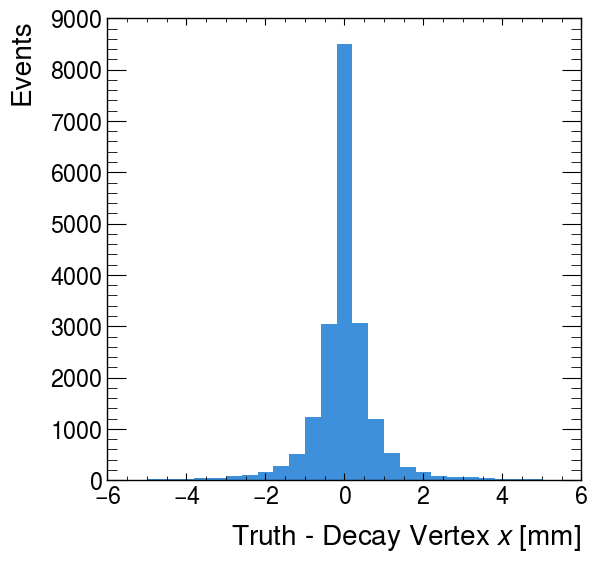

<Figure size 800x600 with 0 Axes>

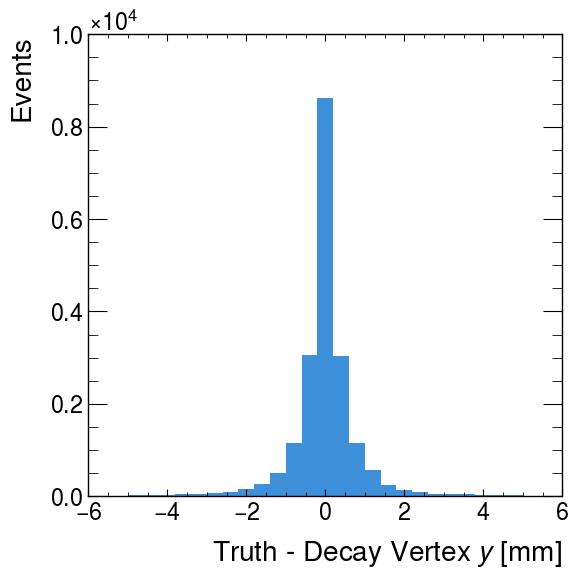

<Figure size 800x600 with 0 Axes>

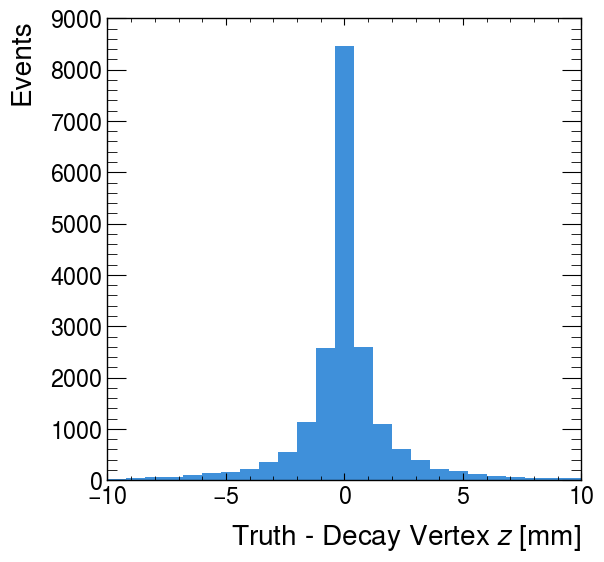

<Figure size 800x600 with 0 Axes>

In [12]:
plot_histogram(truth_decau_vertex.x - est_decau_vertex.x, bins=25, range=(-5, 5),
                xlabel=r"Truth - Decay Vertex $x$ [mm]", ylabel="Events",
                save = 'plots/delta_decay_vertex_x.pdf')
plot_histogram(truth_decau_vertex.y - est_decau_vertex.y, bins=25, range=(-5, 5),
                xlabel=r"Truth - Decay Vertex $y$ [mm]", ylabel="Events",
                save = 'plots/delta_decay_vertex_y.pdf')
plot_histogram(truth_decau_vertex.z - est_decau_vertex.z, bins=25, range=(-10, 10),
                xlabel=r"Truth - Decay Vertex $z$ [mm]", ylabel="Events",
                save = 'plots/delta_decay_vertex_z.pdf')